# LEVEL-2

# Task1- analyze the distribution of aggregate ratins and determine the most common rating range and calculate the average number of votes received by restaurants

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
print(df.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [4]:
Aggregate_ratings = df['Aggregate rating']
Rating_counts = Aggregate_ratings.value_counts().sort_index()

In [5]:
most_common_rating_range = Rating_counts.idxmax()

print(f"The most common rating range for restaurant ratings is {most_common_rating_range}.")

The most common rating range for restaurant ratings is 0.0.


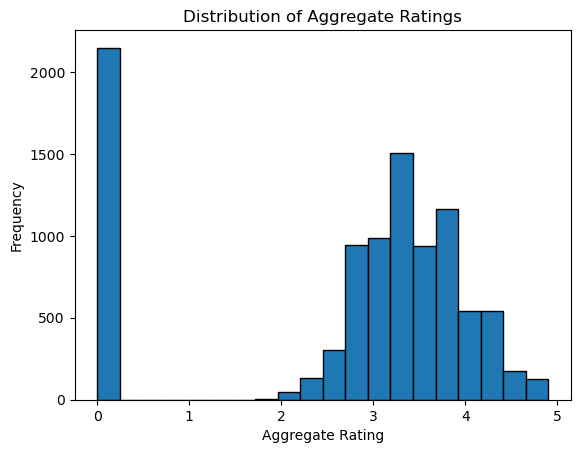

In [6]:
plt.hist(Aggregate_ratings, bins=20, edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Ratings')
plt.show()

In [7]:
average_votes = df['Votes'].mean()

print(f"The average number of votes received by restaurants is: {average_votes:.2f}")

The average number of votes received by restaurants is: 156.91


# task2- identify the most common combinations of cuisines in the dataset and determine if certain cuine combinations tend to have higher ratings

In [8]:
Cuisines = df["Cuisines"]
Aggregate_ratings = df["Aggregate rating"]

In [9]:
Cuisine_combinations_counts = Cuisines.value_counts()

In [10]:
Most_common_cuisine_combinations = Cuisine_combinations_counts.head(10)
print("Most common cuisine combinations:")
print(Most_common_cuisine_combinations)

Most common cuisine combinations:
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64


In [11]:
Cuisine_combinations_avg_rating = df.groupby("Cuisines")["Aggregate rating"].mean()


In [12]:
top_10_avg_ratings = Cuisine_combinations_avg_rating.nlargest(10)
print("\nAverage ratings for the top 10 cuisine combinations:")
print(top_10_avg_ratings)


Average ratings for the top 10 cuisine combinations:
Cuisines
American, BBQ, Sandwich         4.9
American, Burger, Grill         4.9
American, Caribbean, Seafood    4.9
American, Coffee and Tea        4.9
American, Sandwich, Tea         4.9
BBQ, Breakfast, Southern        4.9
Burger, Bar Food, Steak         4.9
Continental, Indian             4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
Name: Aggregate rating, dtype: float64


# task3- plot the locations of restaurants on a map using longitude and latitude coordinates and identify any patterns or cluster of restaurants in specific area

In [13]:
import folium
from IPython.display import display
from sklearn.cluster import KMeans

In [14]:
map_center = [40.7128, -74.0060]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

In [15]:
def add_restaurant_markers(row):
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name'], 
        icon=folium.Icon(icon='cutlery', prefix='fa')  
    ).add_to(restaurant_map)

In [16]:
df.apply(add_restaurant_markers, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
9546    None
9547    None
9548    None
9549    None
9550    None
Length: 9551, dtype: object

In [17]:
restaurant_map.save('restaurant_map.html')

In [18]:
X = df[['Latitude', 'Longitude']]

In [19]:
inertia_values = []
k_range = range(1, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

C:\Users\Puja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Puja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Puja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Puja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Puja\anaconda3\Lib\site-packages\sklearn\cluster\_k

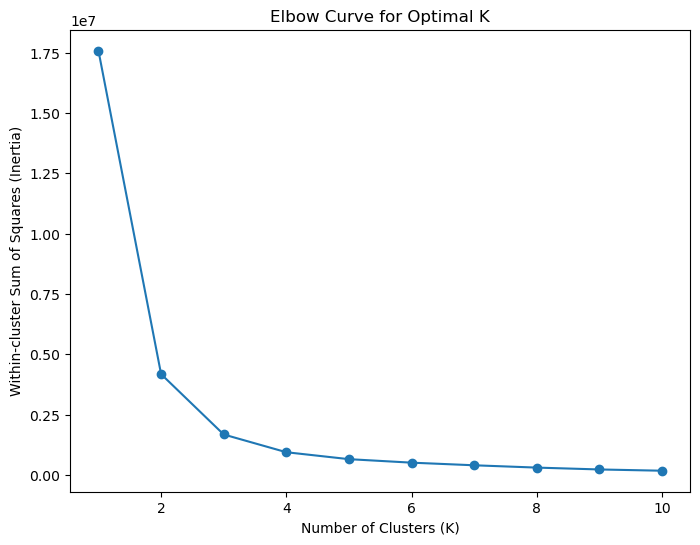

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Curve for Optimal K')
plt.show()

In [21]:
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

C:\Users\Puja\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


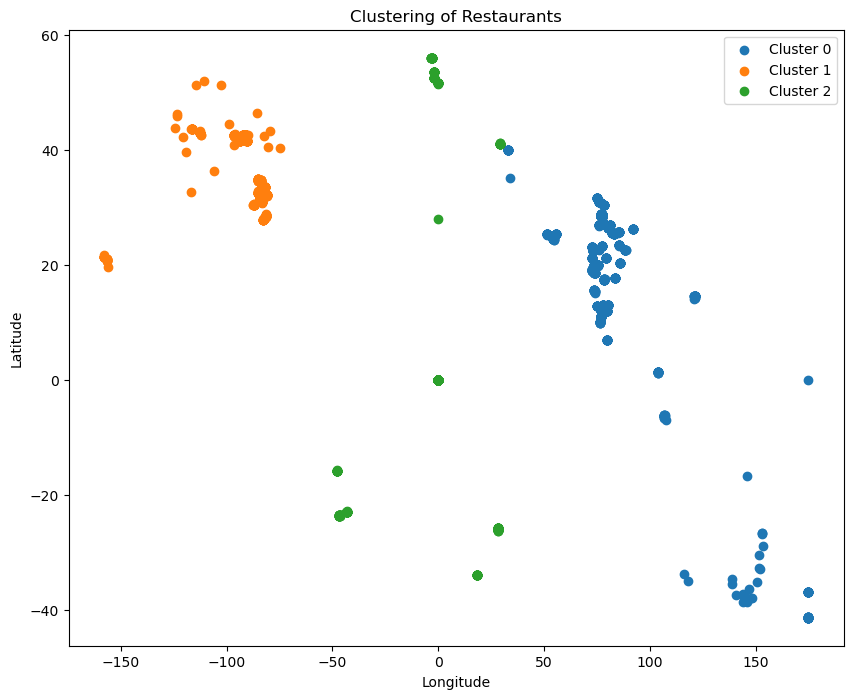

In [22]:
plt.figure(figsize=(10, 8))
for cluster_id in range(k):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_id}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Restaurants')
plt.legend()
plt.show()

# Task4- Restaurant Chains Identify if there are any restaurant chains present in the dataset. Analyze the ratings and popularity of different restaurant chains

In [23]:
Restaurant_chains = df.groupby("Restaurant Name").size().reset_index(name="Chain Count")
Restaurant_chains = Restaurant_chains[Restaurant_chains["Chain Count"] > 1]


In [24]:
Restaurant_chains = Restaurant_chains.sort_values(by="Chain Count", ascending=False)


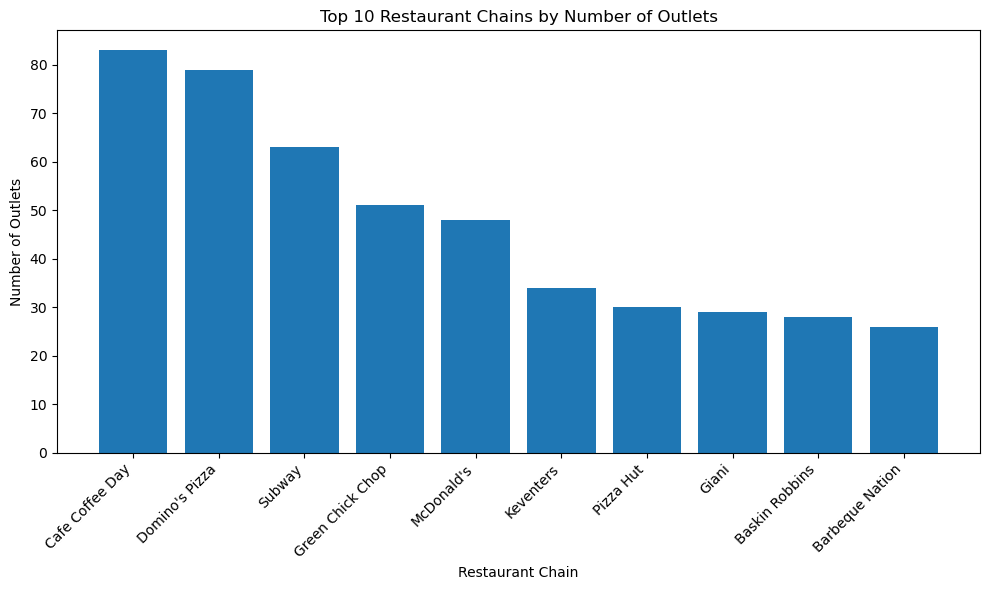

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(Restaurant_chains["Restaurant Name"][:10], Restaurant_chains["Chain Count"][:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Outlets")
plt.title("Top 10 Restaurant Chains by Number of Outlets")
plt.tight_layout()
plt.show()

In [26]:
Chain_ratings = df.groupby("Restaurant Name")["Aggregate rating"].mean().reset_index(name="Average Rating")
Chain_votes = df.groupby("Restaurant Name")["Votes"].sum().reset_index(name="Total Votes")


In [27]:
Chain_analysis = pd.merge(Chain_ratings, Chain_votes, on="Restaurant Name")

In [28]:
Chain_analysis = Chain_analysis.sort_values(by="Average Rating", ascending=False)


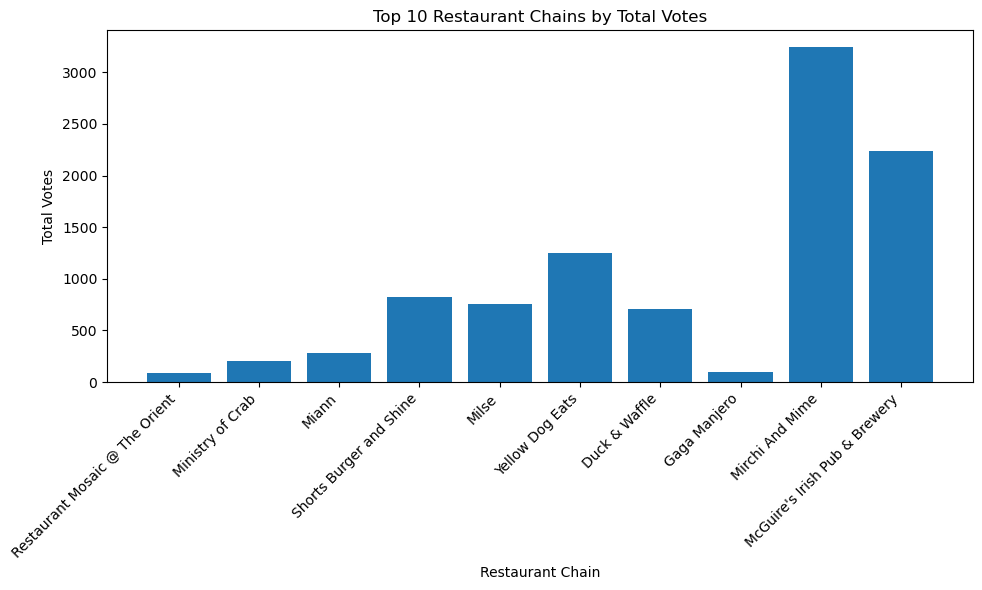

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(Chain_analysis["Restaurant Name"][:10], Chain_analysis["Total Votes"][:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Restaurant Chain")
plt.ylabel("Total Votes")
plt.title("Top 10 Restaurant Chains by Total Votes")
plt.tight_layout()
plt.show()

In [30]:
print("Top 10 Restaurant Chains by Number of Outlets:")
print(Restaurant_chains[["Restaurant Name", "Chain Count"]])

Top 10 Restaurant Chains by Number of Outlets:
       Restaurant Name  Chain Count
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48
...                ...          ...
2770           Gullu's            2
2764             Gulab            2
2746     Grover Sweets            2
2739            Grillz            2
7432            bu��no            2

[734 rows x 2 columns]
